In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
file='tennis.csv'
folder='tennis'

In [0]:
file='squash.csv'
folder='squash'

In [0]:
path=Path('')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [0]:
path.ls()

[PosixPath('.config'),
 PosixPath('tennis'),
 PosixPath('tennis.csv'),
 PosixPath('squash.csv'),
 PosixPath('sample_data')]

In [0]:
classes=['tennis','squash']

In [0]:
download_images(path/file,dest,max_pics=200,max_workers=0)

Error https://stgeorgesweybridge.com/uploads/redactor_rails/picture/data/5002/IMG_6619fix.jpg HTTPSConnectionPool(host='stgeorgesweybridge.com', port=443): Max retries exceeded with url: /uploads/redactor_rails/picture/data/5002/IMG_6619fix.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


In [0]:
for c in classes:
  print(c);
  verify_images(path/c,delete=True,max_size=500)

tennis


cannot identify image file <_io.BufferedReader name='tennis/00000029.jpg'>
cannot identify image file <_io.BufferedReader name='tennis/00000077.jpg'>
cannot identify image file <_io.BufferedReader name='tennis/00000000.jpg'>
cannot identify image file <_io.BufferedReader name='tennis/00000057.jpeg'>
squash


cannot identify image file <_io.BufferedReader name='squash/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='squash/00000094.jpg'>
cannot identify image file <_io.BufferedReader name='squash/00000014.jpg'>
cannot identify image file <_io.BufferedReader name='squash/00000050.jpg'>


In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,
              ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

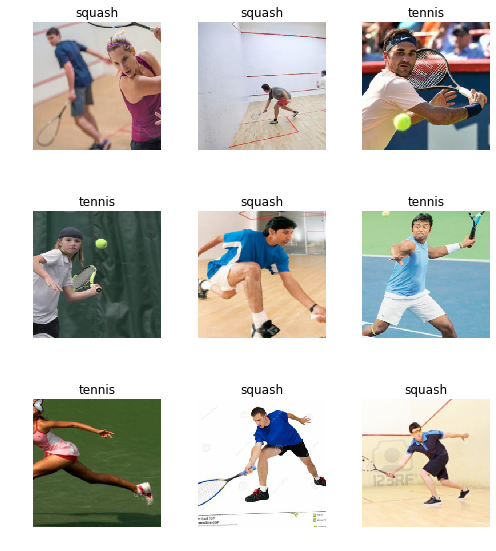

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)

(['squash', 'tennis'], 2, 152, 38)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=accuracy)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


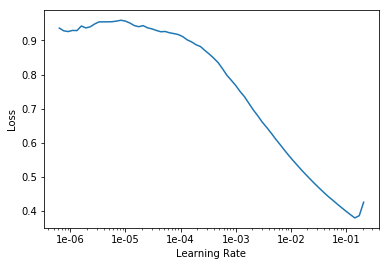

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.912104,0.620175,0.684211,00:02
1,0.658985,0.189761,0.947368,00:02
2,0.491215,0.117007,0.973684,00:03
3,0.385657,0.099220,0.973684,00:02


In [0]:
learn.fit_one_cycle(4,max_lr=slice(3e-4,3e-1))

epoch,train_loss,valid_loss,accuracy,time
0,1.950243,0.000000,1.000000,00:02
1,1.100322,0.000000,1.000000,00:02
2,0.979023,0.000000,1.000000,00:02
3,0.753444,0.000000,1.000000,00:02


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


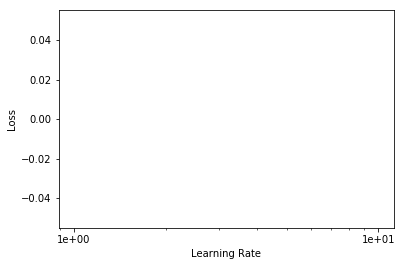

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.544818,0.000000,1.000000,00:02
1,0.405100,0.000000,1.000000,00:02
2,0.625783,1.683856,0.921053,00:02
3,0.596931,2.789038,0.921053,00:02


In [0]:
learn.fit_one_cycle(4,max_lr=slice(3e-4,3e-1))

epoch,train_loss,valid_loss,accuracy,time
0,0.123558,12.916059,0.842105,00:02
1,3.342379,10642.590820,0.473684,00:02
2,6.194122,52612.480469,0.473684,00:02
3,4.973245,4587.071777,0.473684,00:02


In [2]:
print("hello")

hello
